# Import libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', 800)
plt.rcParams['figure.figsize'] = [15, 15]
tweets = pd.read_csv('../data/processed/tweets_x_train.csv')
labels = pd.read_csv('../data/processed/tweets_y_train.csv')
sentiment_map = {2:'neutral', 1:'positive', 0:'negative'}
sentiment = labels['sentiment_id'].apply(lambda x: sentiment_map[x])
tweets = pd.concat([tweets, sentiment], axis=1)

In [11]:
tweets.head()

,tweet_id,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment_id
0,569643210785497088,Customer Service Issue,1.0000,American,galen_emery,0,@AmericanAir I can't keep dialing you guys all day. Can I get into the callback queue?,2015-02-22 15:41:39 -0800,"Seattle, WA",Pacific Time (US & Canada),negative
1,569158629443502081,NaN,NaN,Delta,JetBlueNews,0,@JetBlue Fliers to Gain Access to WSJ Content - Analyst Blog - Nasdaq http://t.co/dWEse7Xidr,2015-02-21 07:36:06 -0800,USA,Sydney,neutral
2,569542909533384707,Late Flight,0.6838,Delta,Amagrino,0,@JetBlue @Amagrino will you cover the cost of my car service waiting time?!,2015-02-22 09:03:05 -0800,"New York, NY",Eastern Time (US & Canada),negative
3,569671981852798976,Flight Attendant Complaints,0.3477,Delta,SaulFernandezS,0,"@JetBlue after boarding flight 0510, the captain informs that he could exceed the16 hrs regulation and turned the plane around. Incredible!",2015-02-22 17:35:59 -0800,NaN,Santiago,negative
4,567663504102940672,Late Flight,0.6605,Southwest,followkashyap,0,@SouthwestAir We have been stuck in SJU for several hours and no one is answering here. Really tough to LUV SW. No response is bad.,2015-02-17 04:35:00 -0800,USA,Eastern Time (US & Canada),negative


# First glimpse of dataset

In [5]:
pd.DataFrame(tweets['text']).head()

,text
0,@AmericanAir I can't keep dialing you guys all day. Can I get into the callback queue?
1,@JetBlue Fliers to Gain Access to WSJ Content - Analyst Blog - Nasdaq http://t.co/dWEse7Xidr
2,@JetBlue @Amagrino will you cover the cost of my car service waiting time?!
3,"@JetBlue after boarding flight 0510, the captain informs that he could exceed the16 hrs regulation and turned the plane around. Incredible!"
4,@SouthwestAir We have been stuck in SJU for several hours and no one is answering here. Really tough to LUV SW. No response is bad.


# Sentiment countplots

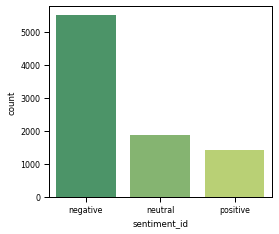

In [33]:
sns.set_context("paper", font_scale=0.9)
plt.figure(figsize=(4., 3.5))
plt.tight_layout()
senti_count = sns.countplot('sentiment_id', data=tweets, palette='summer')  
senti_count_fig = senti_count.get_figure()
senti_count_fig.savefig('../figures/senti_count.png', dpi=500)

# Sentiment count plots by airline

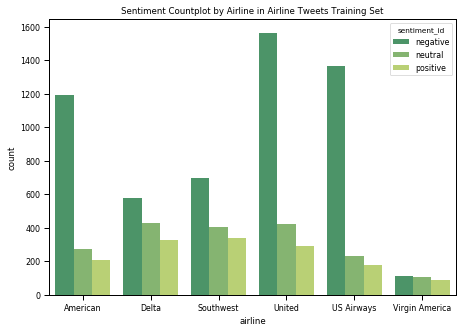

In [15]:
sns.set_context("paper", font_scale=0.9)
plt.figure(figsize=(6.3, 4.5))
plt.title('Sentiment Countplot by Airline in Airline Tweets Training Set')
plt.tight_layout()
senti_count_by_airline = sns.countplot('airline', hue='sentiment_id', data=tweets, palette='summer')
senti_count_by_airline_fig = senti_count_by_airline.get_figure()
senti_count_by_airline_fig.savefig('senti_count_by_airline.png', dpi=500)

# Number of tweets per airline

Text(0.5, 1.0, 'Number of tweets by airline')

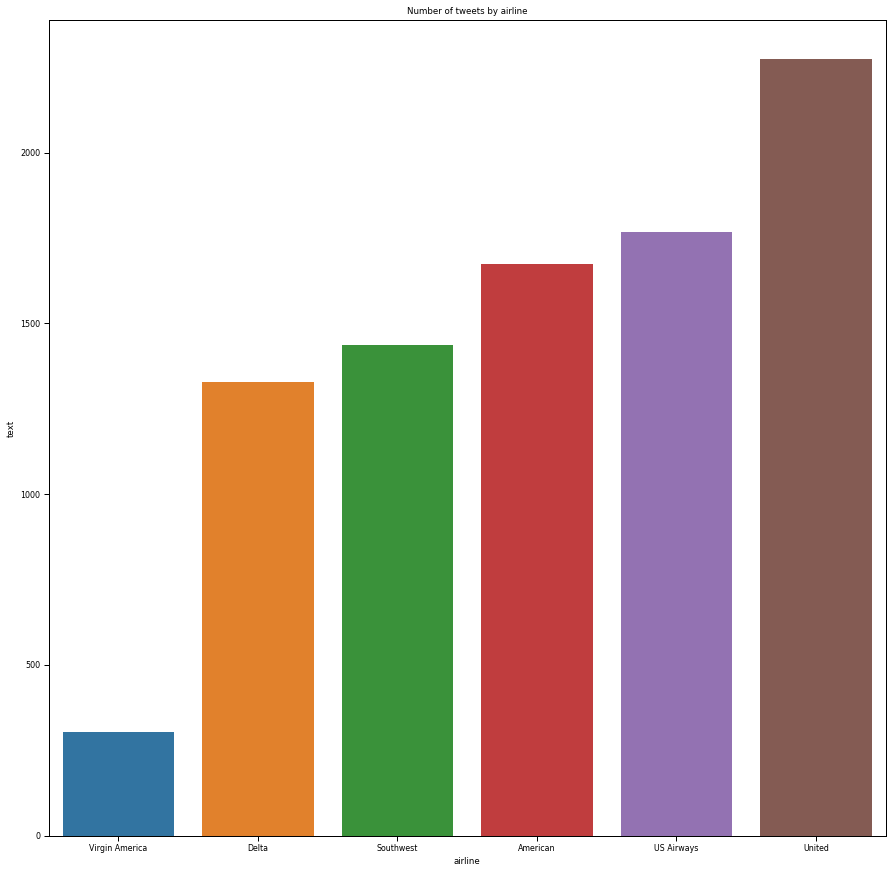

In [16]:
tweets_per_airline = tweets.groupby('airline')['text'].count().sort_values().reset_index()
sns.barplot(x='airline', y='text', data=tweets_per_airline)
plt.title('Number of tweets by airline')

# Reasons for negative tweets

In [17]:
tweets_neg_reason = tweets.groupby('negativereason')['text'].count().sort_values()  # write labeling functions acc to negative reasons and positive reasons 
tweets_neg_reason

negativereason
Damaged Luggage                  46
longlines                        93
Flight Attendant Complaints     288
Flight Booking Problems         313
Bad Flight                      326
Lost Luggage                    434
Cancelled Flight                546
Can't Tell                      704
Late Flight                     999
Customer Service Issue         1758
Name: text, dtype: int64

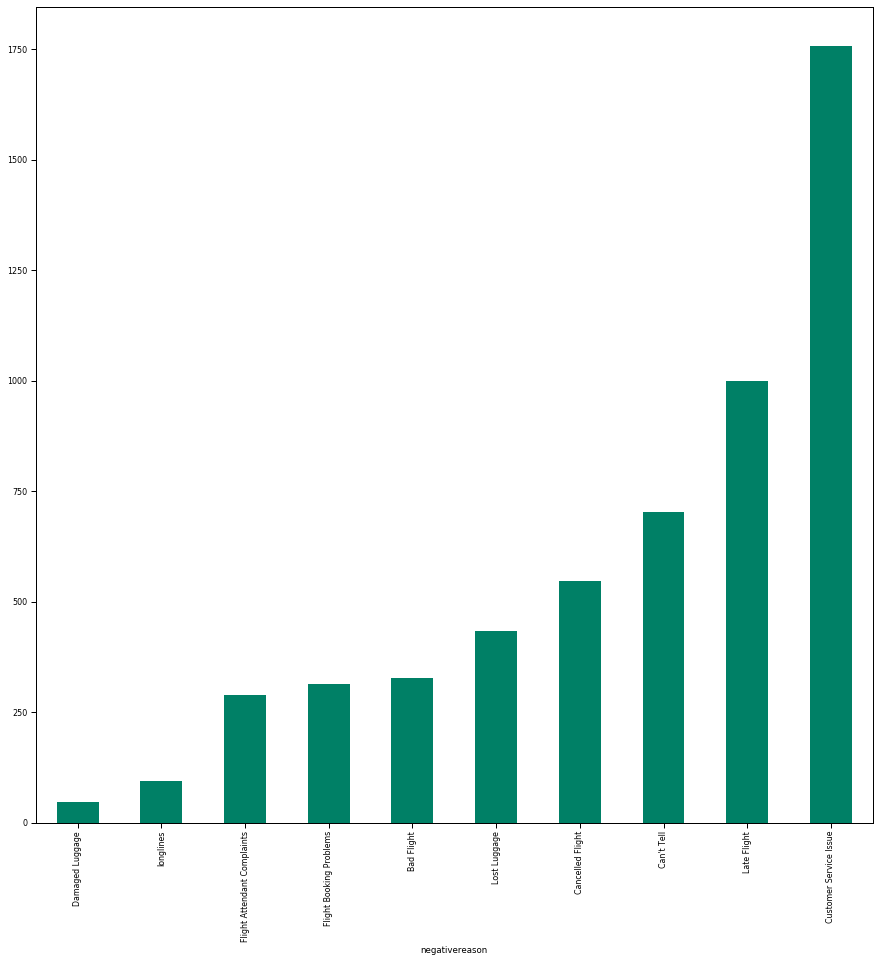

In [18]:
tweets_neg_reason.plot(kind='bar', colormap='summer')

# Tweet length summary statistics

In [73]:
def func(x):
    return len(x.split(' '))
print(tweets['text'].apply(func).describe())

count    8784.000000
mean       17.750455
std         6.938688
min         2.000000
25%        12.000000
50%        19.000000
75%        23.000000
max        35.000000
Name: text, dtype: float64


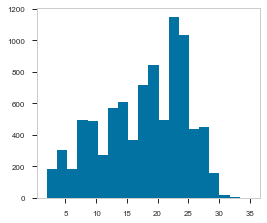

In [53]:
plt.rcParams["axes.grid"] = False
sns.set_context("paper", font_scale=0.9)
plt.figure(figsize=(4., 3.5))
plt.hist(tweets['text'].apply(func), bins=20)
plt.savefig('../figures/tweets_text_lengths.png', dpi=500)

count    5507.000000
mean       19.844925
std         5.970255
min         2.000000
25%        16.000000
50%        21.000000
75%        24.000000
max        35.000000
Name: text, dtype: float64


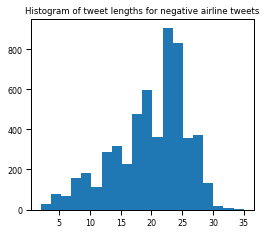

In [27]:
def func(x):
    return len(x.split(' '))

print(tweets[tweets['sentiment_id']=='negative']['text'].apply(func).describe())
sns.set_context("paper", font_scale=0.9)
plt.figure(figsize=(4., 3.5))
plt.title('Histogram of tweet lengths for negative airline tweets')
plt.hist(tweets[tweets['sentiment_id']=='negative']['text'].apply(func), bins=20)
plt.savefig('../figures/neg_tweet_hist.png')

count    1418.000000
mean       14.012694
std         7.116719
min         2.000000
25%         8.000000
50%        14.000000
75%        20.000000
max        31.000000
Name: text, dtype: float64


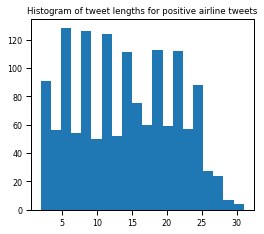

In [29]:
print(tweets[tweets['sentiment_id']=='positive']['text'].apply(func).describe())
sns.set_context("paper", font_scale=0.9)
plt.figure(figsize=(4., 3.5))
plt.title('Histogram of tweet lengths for positive airline tweets')
plt.hist(tweets[tweets['sentiment_id']=='positive']['text'].apply(func), bins=20)
plt.savefig('../figures/pos_tweet_hist.png')

count    1859.000000
mean       14.396988
std         6.958396
min         2.000000
25%         9.000000
50%        14.000000
75%        20.000000
max        32.000000
Name: text, dtype: float64


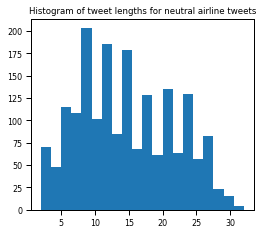

In [30]:
print(tweets[tweets['sentiment_id']=='neutral']['text'].apply(func).describe())
sns.set_context("paper", font_scale=0.9)
plt.figure(figsize=(4., 3.5))
plt.title('Histogram of tweet lengths for neutral airline tweets')
plt.hist(tweets[tweets['sentiment_id']=='neutral']['text'].apply(func), bins=20)
plt.savefig('../figures/neu_tweet_hist.png')

# Frequency Distributions

In [35]:
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import UMAPVisualizer
from yellowbrick.text import DispersionPlot
from yellowbrick.text import PosTagVisualizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

/Users/jeanne/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [36]:
# add stopwords to out-of-the-box list
# https://www.scikit-yb.org/en/latest/api/text/freqdist-3.py
from sklearn.feature_extraction import text

airline_stop_words = ['united', 'usairways', 'southwestair', 'americanair', 'jetblue', 'virginamerica', 'flight', 'http']
custom_stop_words = text.ENGLISH_STOP_WORDS.union(airline_stop_words)

In [55]:
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(tweets['text'])
features = vectorizer.get_feature_names()

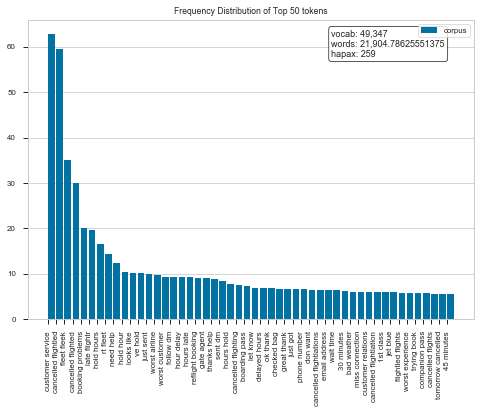

In [56]:
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [66]:
# https://www.scikit-yb.org/en/latest/api/text/freqdist-3.py
from collections import defaultdict
airlines = defaultdict(list)
for text, label in zip(tweets['text'], tweets['sentiment_id']):
  airlines[label].append(text)

In [67]:
vectorize = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in airlines['positive'])
features = vectorizer.get_feature_names()

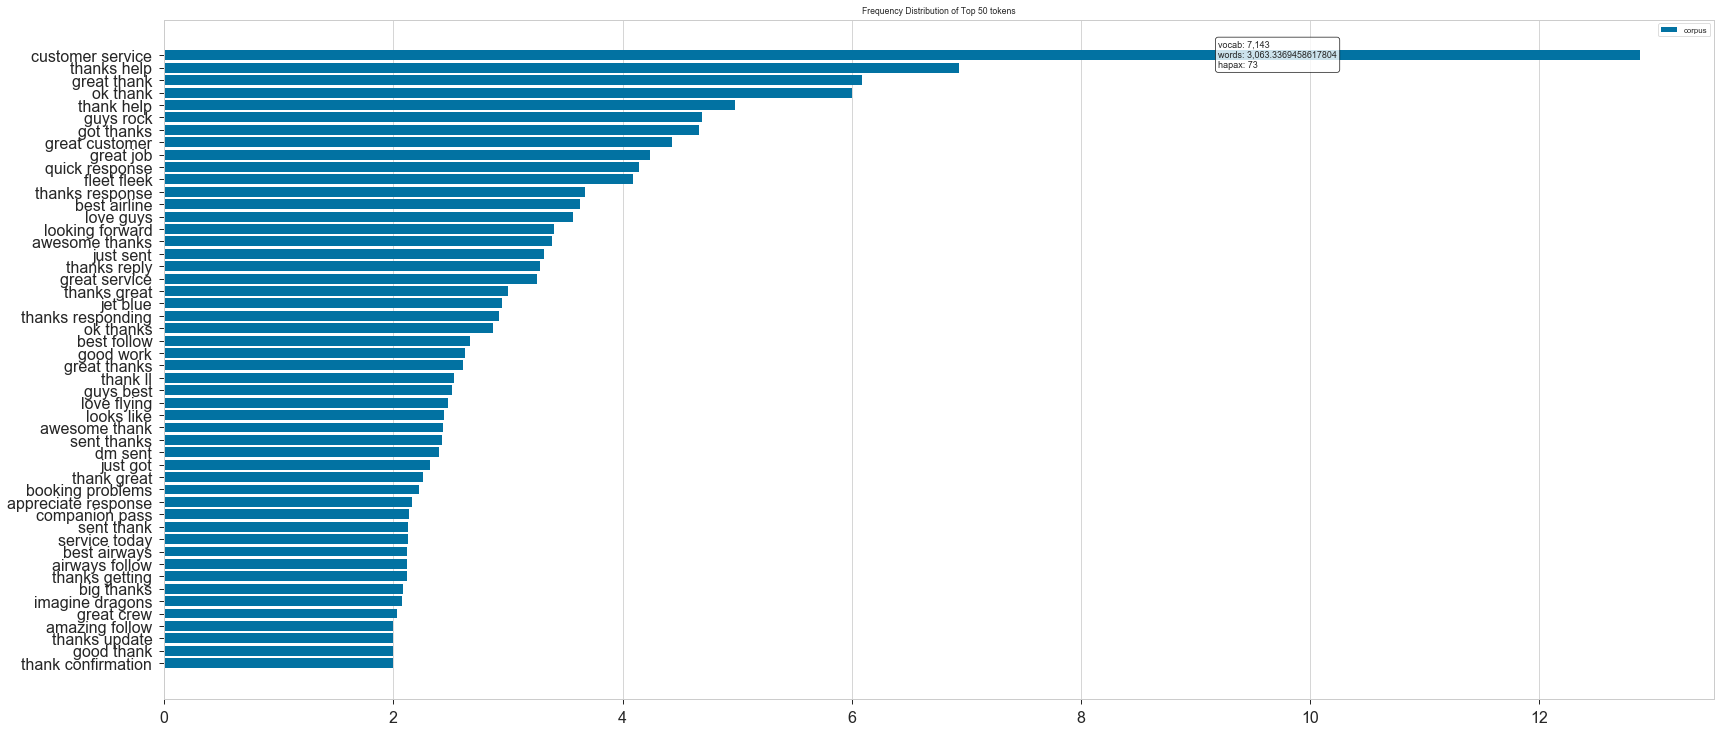

In [68]:
visualizer = FreqDistVisualizer(features=features, size=(2000,900), dpi=500)
visualizer.fit(docs)
visualizer.ax.tick_params(axis='both', which='major', labelsize=16)
visualizer.show(outpath='../figures/positive_airline_tweets_token_dist_plot')

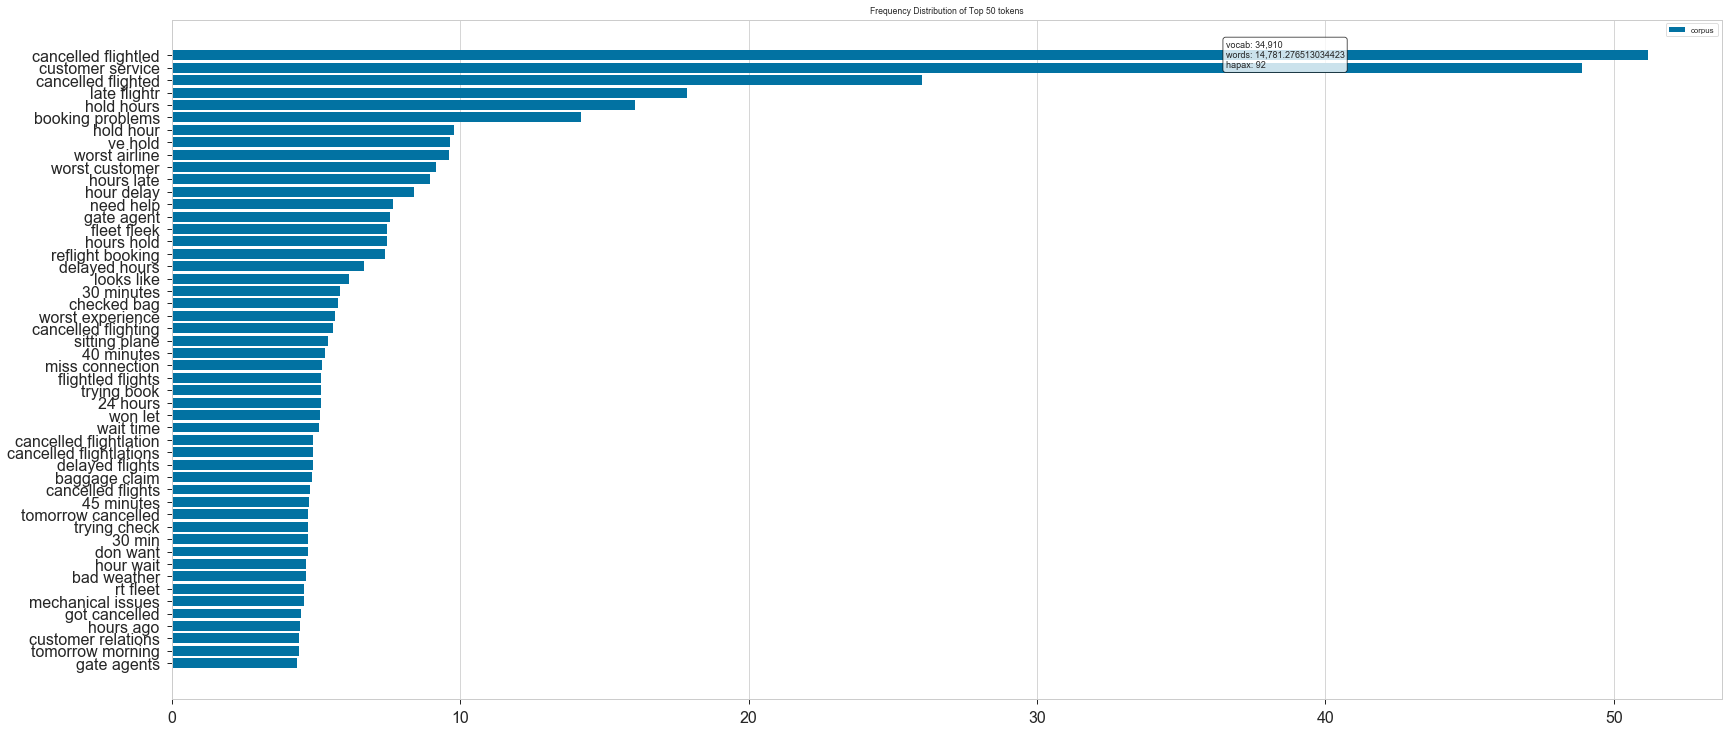

In [69]:
vectorize = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in airlines['negative'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, size=(2000,900))
visualizer.fit(docs)
visualizer.ax.tick_params(axis='both', which='major', labelsize=16)
visualizer.show(outpath='../figures/negative_airline_tweets_token_dist_plot')

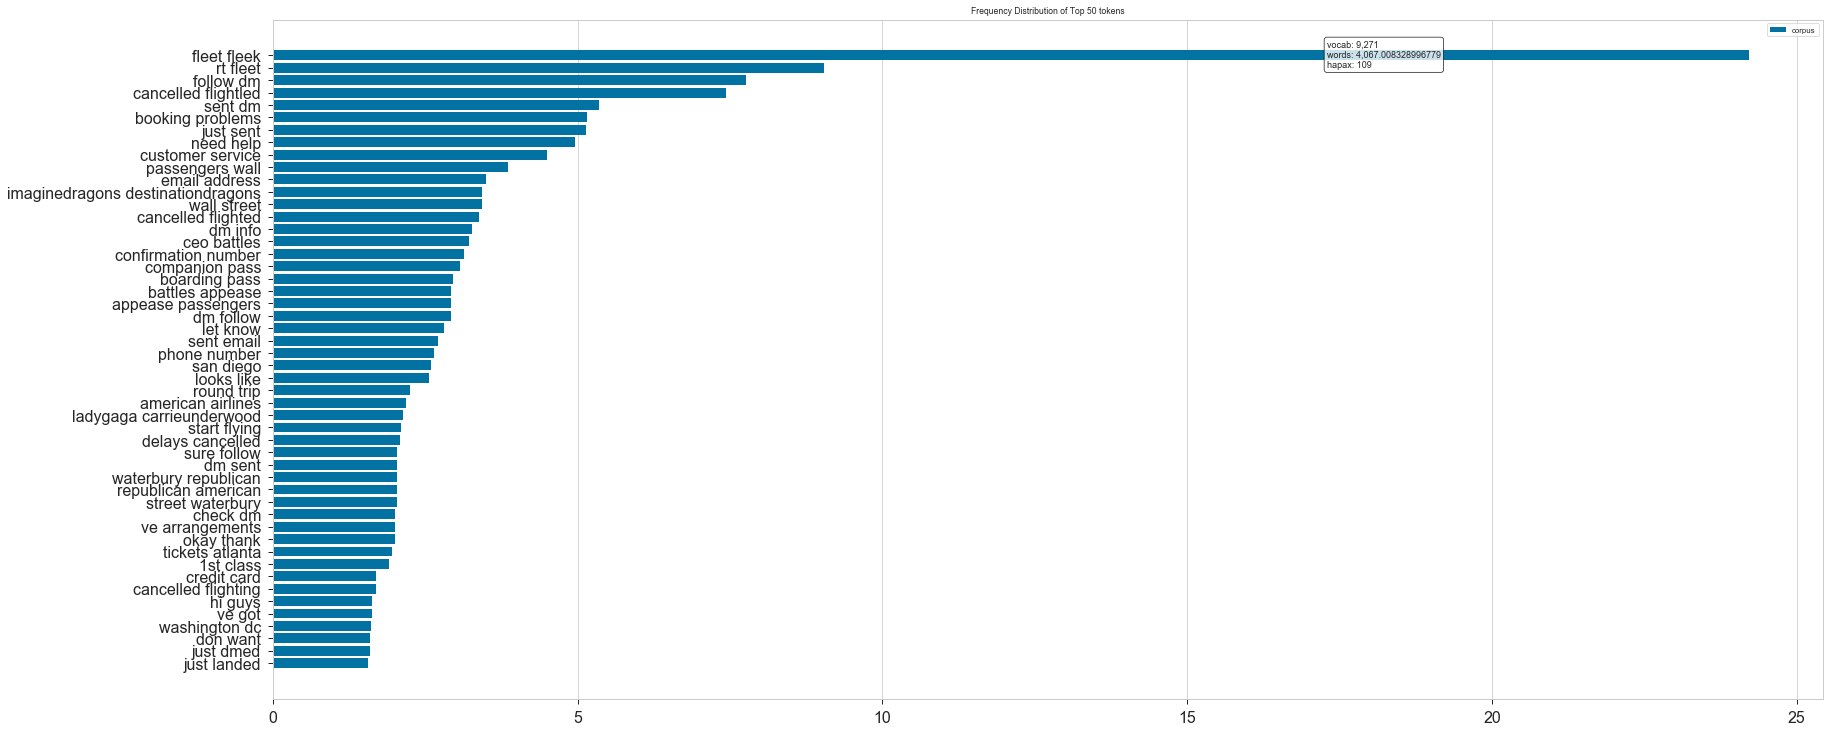

In [71]:
vectorize = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in airlines['neutral'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, size=(2000,900))
visualizer.fit(docs)
visualizer.ax.tick_params(axis='both', which='major', labelsize=16)
visualizer.show(outpath='../figures/neutral_airline_tweets_token_dist_plot')

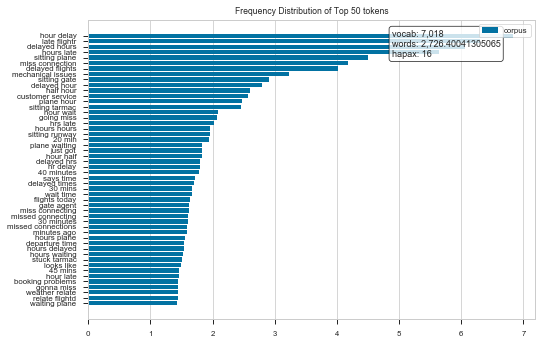

In [63]:
from collections import defaultdict
airlines = defaultdict(list)
for text, label in zip(tweets['text'], tweets['negativereason']):
  airlines[label].append(text)
vectorize = TfidfVectorizer(stop_words='english')
docs = vectorizer.fit_transform(text for text in airlines['Late Flight'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words=custom_stop_words)
X = count_vec.fit_transform(tweets['text'])
y = tweets['sentiment_id']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


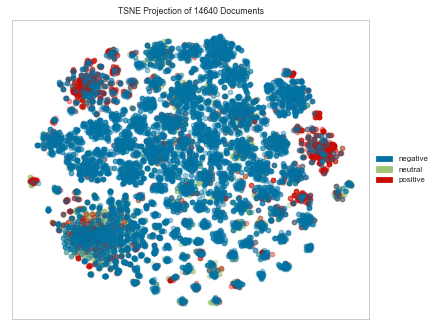

In [130]:
tsne = TSNEVisualizer(alpha=0.4)
tsne.fit(X, y)
tsne.show(outpath='figures/tweets_tsne')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


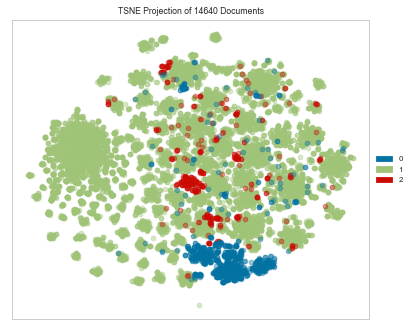

In [131]:
# unsupervised clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y = kmeans.labels_
tsne = TSNEVisualizer(alpha=0.4)
tsne.fit(X, y)
tsne.show(outpath='figures/tweets_tsne_kmeans.png')

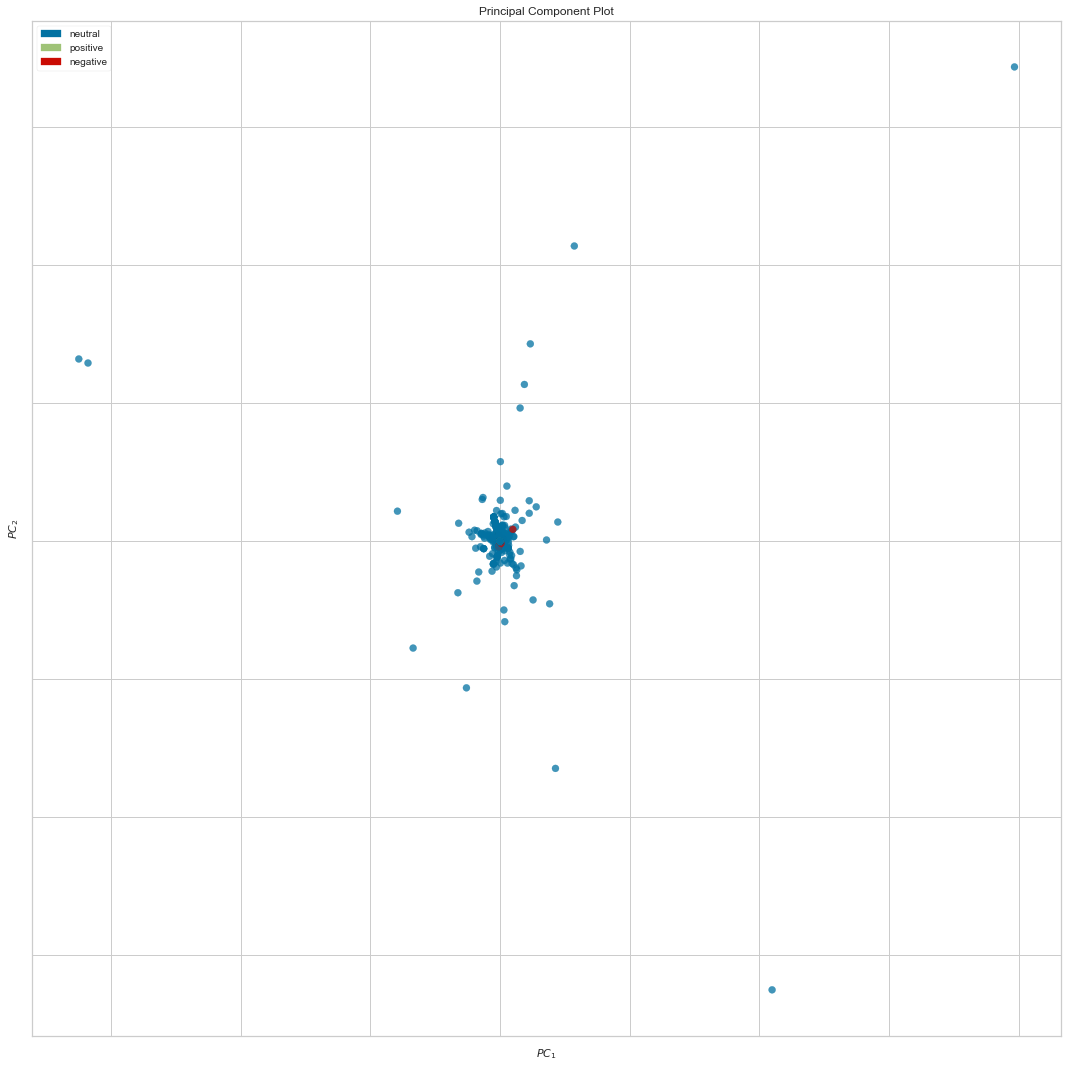

In [102]:
from yellowbrick.features import PCA
from sklearn import preprocessing
X_preproc = preprocessing.scale(X.toarray()) # for more info see here:http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html
classes = tweets['airline_sentiment'].unique()
visualizer = PCA(projection = 2, classes=classes)
visualizer.fit_transform(X_preproc,y)
visualizer.show()

# cluster by sentence similarity

In [140]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [141]:
encodings = model.encode(tweets['text'])

In [145]:
len(encodings)

14640

In [142]:
from sklearn.cluster import KMeans
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(encodings)
cluster_assignment = clustering_model.labels_

In [135]:
import joblib
joblib.dump(clustering_model, 'tweets_kmeans.joblib')

['tweets_kmeans.joblib']

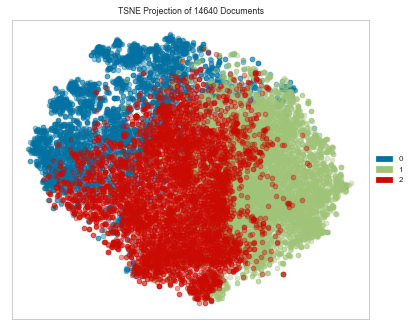

In [144]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer(alpha=0.4)
tsne.fit(encodings, cluster_assignment)
tsne.show(outpath='figures/tweets_tsne_sentence_sim')

In [20]:
tweets['cluster_label']=cluster_assignment
tweets[tweets['cluster_label']==0]['text'].sample(50, random_state=1)

11442                  @USAirways why would you board ppl on a plane b4 its their turn to de-ice? Why would you have ppl then wait through the hour long process?
4432                                  @SouthwestAir hey I'm flying from Tampa to Denver today and I want to know if there will be tv's in the seats like @JetBlue
3332                                                                                    @United  my home for the next 8.5 hrs. 777 GFC! :) http://t.co/MKpoGNntYC
4394                  @SouthwestAir @SMiles1307 over two hours now.  Ugh we should all get vouchers this is inexcusable ESP after a pre flight check that was ok.
7439                                    @JetBlue flight from BOS - RSW tomorrow, all i need is my wife + 3yr old to sit together, but no option when checking in.
8569                                                                                                 @JetBlue BEST SEAT ON A E190 to board early. READY. SET. GO!
12870                       

In [21]:
tweets[tweets['cluster_label']==1]['text'].sample(50, random_state=1)

8203     @JetBlue Awww thank you B6! Glad to hear it!  Made my day! &amp; one last question do you have any idea what tail is operating flt 606 2maro? :)
2910                                                                                                       @united workin on it. Waiting on him to reply.
14245                                                                                                 @AmericanAir I'm great thanks keep up the good work
2580                                                                                             @united nice and early back home! http://t.co/geG4nghmIE
8901              @JetBlue @KyleJudah It doesn't matter who you directed me to. It's the principle of the matter. When I gate checked the stroller it was
4282                                                                                        @united i need my confirmation number! Can you give it to me?
2998                                                                        

In [22]:
tweets[tweets['cluster_label']==2]['text'].sample(50,random_state=1)

1700                 @united lost my bags and there was a flight from Chi to Eri that landed over 1.5 hrs ago...yet still have zero updates?? #UnitedAirlinesSux
10007                 @USAirways going to miss my connection because my flight home has been delayed and now no gate agent to get us off the plane-so frustrated
827                                      @united Flight attendant never served me my beverage (tea), and not once checked up on me. What gives? #ua6076 #notcool
5547                                                               @SouthwestAir Late Flightly you've always been Late Flight! Please get back to the old #SWA!!
11066                         @USAirways @AmericanAir you know...hockey sticks are expensive. Your baggage handlers shouldn't just be throwing them on the cart.
10608                                                                         @USAirways baggage drop at phl b/c is incredibly backed up... unacceptable service
5429                              

In [72]:
labels2idx = {'neutral':1, 'positive': 0, 'negative':2}
gt_sentiment = tweets['airline_sentiment'].apply(lambda x: labels2idx[x])
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
print(precision_recall_fscore_support(gt_sentiment, tweets['cluster_label']))
print(accuracy_score(gt_sentiment, tweets['cluster_label']))

(array([0.09003899, 0.35847232, 0.9111294 ]), array([0.21498096, 0.47854146, 0.48256701]), array([0.12692067, 0.40989497, 0.63095662]), array([2363, 3099, 9178]))
0.4385245901639344


In [73]:
confusion_matrix(gt_sentiment, tweets['cluster_label'])

array([[ 508, 1782,   73],
       [1257, 1483,  359],
       [3877,  872, 4429]])